# Walmart Sales Dataset of 45 stores

* Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. 
The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. 
It also owns and operates Sam's Club retail warehouses. In India, Walmart operates under the name of Flipkart Wholesale.

# How Walmart uses Big Data?

1.Improving Store Checkout: By using Predictive Analysis, the stores can anticipate demand at a certain week and determine how many Sales Representatives / Employees are needed.                                                                               
2.Managing the Steps of Supply Chain: The company optimizes the routes to the shipping dock and tracks the number of times the product is accessed before it reaches the Customer's destination. Also, it uses the data to analyze transportation lanes and routes for the company's trucks. These data help Walmart keep transportation costs down and schedule an appropriate time for drivers.                                                                                                                        
3.Optimizing Product Assortment: By analyzing customer preferences and shopping patterns, Walmart accelerates the decision-making on how to maintain stocks. Big Data provides insights on new items and discontinued products.                                                       
4.Personalizing Shopping Experience: With Big Data, Walmart analyzes the shopping preferences of the customers to develop a consistent and delightful shopping experience.
and much more.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
### Set Option to None To Show All Columns
pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\utkar\\Downloads\\archive (1)\\walmart-sales-dataset-of-45stores.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# Find Missing Values
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [10]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
# Convert 'date' column into datetime object
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

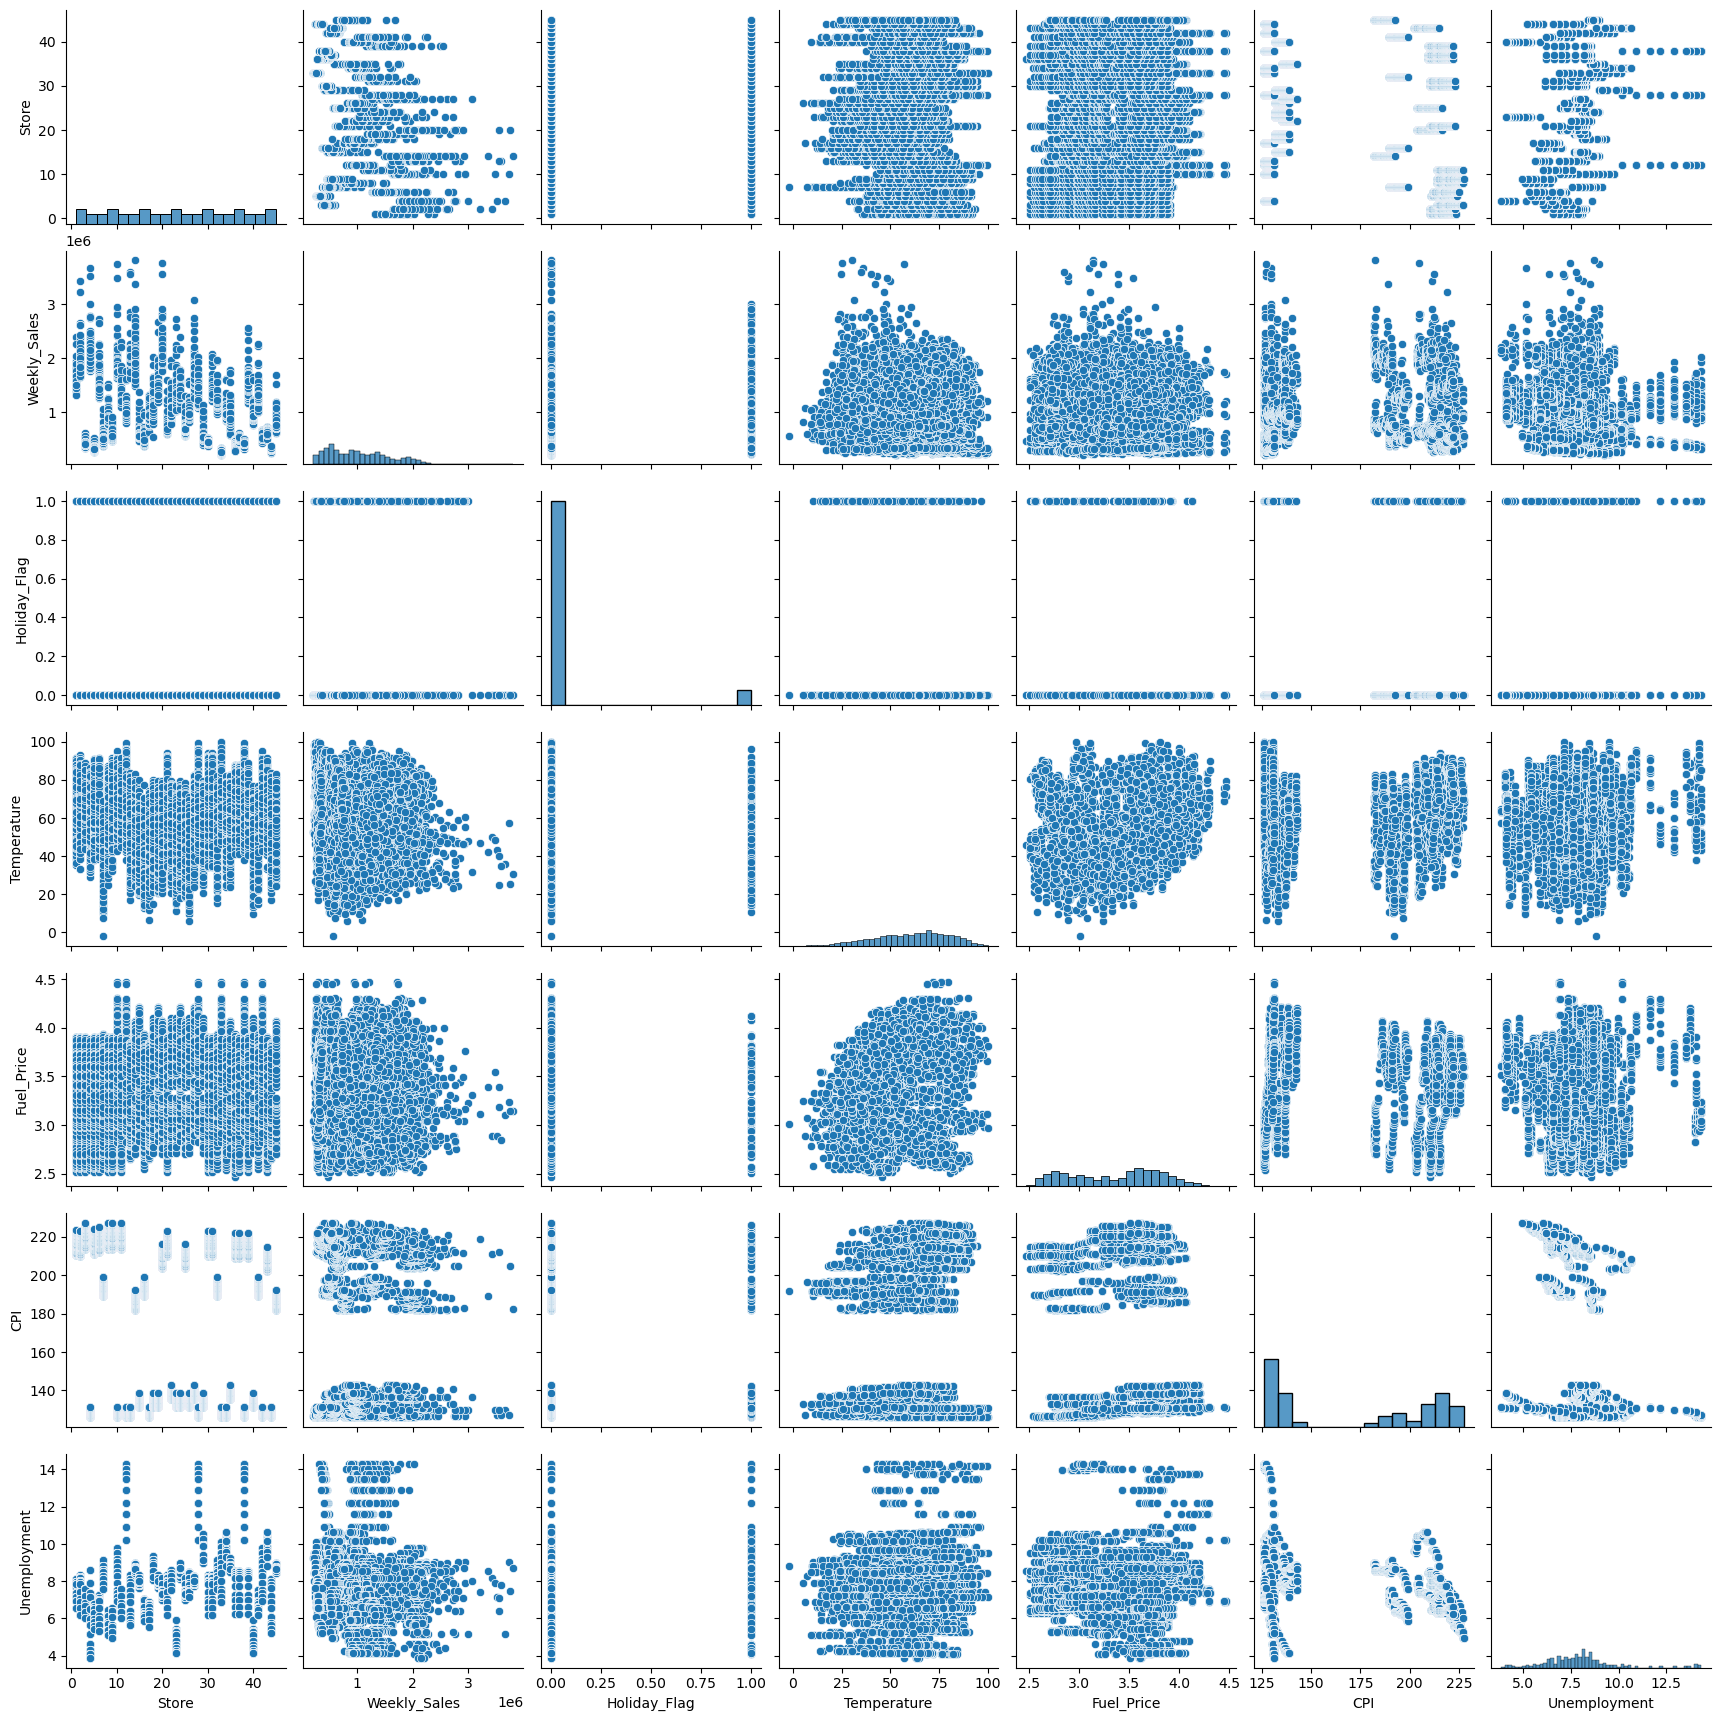

In [5]:
sns.pairplot(df)

# Adding New Features

#### Adding Date, Month, Year, Holiday Features

In [15]:
#print(type(df['Date'][0]))


str(df['Date'][0])[:10]

'2010-02-05'

In [16]:
# #Adding 'Month_Num', 'Month_Name'
df['Month_Num'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name().str[:3]

# #Adding 'Year'
df['Year'] = df['Date'].dt.year

# #Adding given holidays in the dataframe
superBowl = ['2010-02-12', '2011-02-11', '2012-02-10']
labourDay = ['2010-09-10', '2011-09-09', '2012-09-07']
thanksGiving = ['2011-11-25', '2010-11-26', '2012-11-23']
christmas = ['2012-12-28', '2011-12-30', '2010-12-31']

def holidays(x):
    if str(x)[:10] in superBowl:
        return 'Super Bowl'
    elif str(x)[:10] in labourDay:
        return 'Labour Day'
    elif str(x)[:10] in thanksGiving:
        return 'Thanksgiving'
    elif str(x)[:10] in christmas:
        return 'Christmas'
    else:
        return 'No Holiday'

df['Holiday'] = df['Date'].apply(holidays)

#### Changing data type of 'Store' columns and its value

In [18]:
df['Store_Num'] = df['Store'].map({value: 'Store ' + str(value) for value in df['Store'].unique().tolist()})

#### Adding Seasons

Typically in Northern Hemisphere Season Starts: 
- Spring: March 21 - June 20
- Summer: June 21 - September 20
- Fall: September 21 - December 20
- Winter: December 21 - March 20

In [22]:
df['Season'] = ''

for x in tqdm(range(df.Year.min() - 1, df.Year.max() + 1)):
    # Spring: March 21 - June 20
    df.loc[(df.Date >= str(x) +'-03-21') & (df.Date <= str(x) +'-06-20'),  'Season'] = 'Spring'
    # Summer: June 21 - September 20
    df.loc[(df.Date >= str(x) +'-06-21') & (df.Date <= str(x) +'-09-20'),  'Season'] = 'Summer'
    # Fall: September 21 - December 20
    df.loc[(df.Date >= str(x) +'-09-21') & (df.Date <= str(x) +'-12-20'),  'Season'] = 'Fall'
    # Winter: December 21 - March 20
    df.loc[(df.Date >= str(x) +'-12-21') & (df.Date <= str(x + 1) +'-03-20'),'Season'] = 'Winter'

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 119.71it/s]


In [23]:
#df[df['Season'] =='Winter']

In [24]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
#df

# Drop Columns

In [27]:
df.drop(['Store', 'Holiday_Flag'], axis = 1, inplace = True)


KeyboardInterrupt



In [30]:
# Columns Rearrange

In [31]:
df.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Month_Num', 'Month_Name', 'Year', 'Holiday',
       'Store_Num', 'Season'],
      dtype='object')

In [32]:
newCols = ['Store_Num', 'Date', 'Month_Num', 'Month_Name', 'Year', 'Holiday',
           'Season', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
           ]

In [33]:
df = df[newCols]

In [34]:
df['Year'] = df['Year'].apply(lambda x: str(x))

In [35]:
df.head(16)

Store_Num       Date  Month_Num Month_Name  Year     Holiday  Season  \
0    Store 1 2010-02-05          2        Feb  2010  No Holiday  Winter   
1    Store 1 2010-02-12          2        Feb  2010  Super Bowl  Winter   
2    Store 1 2010-02-19          2        Feb  2010  No Holiday  Winter   
3    Store 1 2010-02-26          2        Feb  2010  No Holiday  Winter   
4    Store 1 2010-03-05          3        Mar  2010  No Holiday  Winter   
5    Store 1 2010-03-12          3        Mar  2010  No Holiday  Winter   
6    Store 1 2010-03-19          3        Mar  2010  No Holiday  Winter   
7    Store 1 2010-03-26          3        Mar  2010  No Holiday  Spring   
8    Store 1 2010-04-02          4        Apr  2010  No Holiday  Spring   
9    Store 1 2010-04-09          4        Apr  2010  No Holiday  Spring   
10   Store 1 2010-04-16          4        Apr  2010  No Holiday  Spring   
11   Store 1 2010-04-23          4        Apr  2010  No Holiday  Spring   
12   Store 1 2010-04-30          4        Apr  2010  No Holiday  Spring   
13   Store 1 2010-05-07          5        May  2010  No Holiday  Spring   
14   Store 1 2010-05-14          5        May  2010  No Holiday  Spring   
15   Store 1 2010-05-21          5        May  2010  No Holiday  Spring   

    Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  
0     1643690.90        42.31       2.572  211.096358         8.106  
1     1641957.44        38.51       2.548  211.242170         8.106  
2     1611968.17        39.93       2.514  211.289143         8.106  
3     1409727.59        46.63       2.561  211.319643         8.106  
4     1554806.68        46.50       2.625  211.350143         8.106  
5     1439541.59        57.79       2.667  211.380643         8.106  
6     1472515.79        54.58       2.720  211.215635         8.106  
7     1404429.92        51.45       2.732  211.018042         8.106  
8     1594968.28        62.27       2.719  210.820450         7.808  
9     1545418.53        65.86       2.770  210.622857         7.808  
10    1466058.28        66.32       2.808  210.488700         7.808  
11    1391256.12        64.84       2.795  210.439123         7.808  
12    1425100.71        67.41       2.780  210.389546         7.808  
13    1603955.12        72.55       2.835  210.339968         7.808  
14    1494251.50        74.78       2.854  210.337426         7.808  
15    1399662.07        76.44       2.826  210.617093         7.808

In [36]:
#df[(df['Store_Num'] == 'Store 4') & (df['Year'] == '2011')]['Weekly_Sales'].sum()

# Explanatory Data Analysis

____

# 1 - Stores with Annual Sales

In [40]:
df1 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)


In [41]:
df1.columns

Index(['Store_Num', 'Year', 'Weekly_Sales'], dtype='object')

In [42]:
new_cols_df1 = ['Store_Num', 'Year', 'Annual_Sales']

In [43]:
df1.columns = new_cols_df1

In [44]:
df1.sort_values(by = ['Year', 'Annual_Sales'], ascending = False, inplace  = True)

In [45]:
df1

Store_Num  Year  Annual_Sales
101   Store 4  2012   92771189.24
38   Store 20  2012   89827709.38
14   Store 13  2012   86707455.02
35    Store 2  2012   81496695.37
5    Store 10  2012   78228616.94
..        ...   ...           ...
66    Store 3  2010   18745419.00
93   Store 38  2010   16587794.52
120   Store 5  2010   14836030.77
114  Store 44  2010   13607519.45
78   Store 33  2010   12766834.26

[135 rows x 3 columns]

In [46]:
#df1[df1['Store_Num'] == 'Store 4']

In [47]:
fig = px.bar(df1, x = 'Store_Num', y = 'Annual_Sales', color = 'Year', facet_col = 'Year', 
             #facet_row = 'Weather Type', 
             width = 1000, height = 550)

fig.update_layout(title = {"text": "Sales from 2010-2012", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(title_text = "Stores", tickmode = 'auto', showgrid = True, categoryorder = "trace") #tickmode = 'linear'
fig.update_yaxes(title_text = "Annual Sales", showgrid = True)
fig.show()

# 2 - TOP 10 Stores with Highest Weekly Sales From Year 2010-2012

In [50]:
df1 = df.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

In [51]:
print("\n")
print("TOP 10 Stores with Highest Weekly Sales\n")
df1.head(10)



TOP 10 Stores with Highest Weekly Sales



Store_Num  Weekly_Sales
12  Store 20  3.013978e+08
33   Store 4  2.995440e+08
5   Store 14  2.889999e+08
4   Store 13  2.865177e+08
11   Store 2  2.753824e+08
1   Store 10  2.716177e+08
19  Store 27  2.538559e+08
41   Store 6  2.237561e+08
0    Store 1  2.224028e+08
32  Store 39  2.074455e+08

In [52]:
#df1[df1['Store_Num'] == 'Store 4']

In [53]:
 fig = px.bar(df1.head(10), x = 'Store_Num', y = 'Weekly_Sales', width = 700, height = 450)

fig.update_layout(title = {"text": "TOP 10 Stores with Highest Weekly Sales from Year 2010-2012", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(title_text = "Stores", tickmode = 'auto', showgrid = True, categoryorder = "trace") #tickmode = 'linear'
fig.update_yaxes(title_text = "Weekly Sales", showgrid = True)
fig.show()

# 3 - Top 5 Stores Each Year

In [55]:
df_top5_2010 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2010\n")
df_top5_2010



TOP 5 Stores with Highest Weekly Sales in 2010



Store_Num  Year  Weekly_Sales
15  Store 14  2010  1.054622e+08
36  Store 20  2010  1.017331e+08
99   Store 4  2010  9.568047e+07
33   Store 2  2010  9.527786e+07
12  Store 13  2010  9.527274e+07

In [56]:
df_top5_2011 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2011\n")
df_top5_2011


TOP 5 Stores with Highest Weekly Sales in 2011



Store_Num  Year  Weekly_Sales
100   Store 4  2011  1.110923e+08
37   Store 20  2011  1.098370e+08
16   Store 14  2011  1.060963e+08
13   Store 13  2011  1.045375e+08
4    Store 10  2011  9.891689e+07

In [57]:
df_top5_2012 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2012\n")
df_top5_2012


TOP 5 Stores with Highest Weekly Sales in 2012



Store_Num  Year  Weekly_Sales
101   Store 4  2012   92771189.24
38   Store 20  2012   89827709.38
14   Store 13  2012   86707455.02
35    Store 2  2012   81496695.37
5    Store 10  2012   78228616.94

In [58]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = df_top5_2010['Store_Num'],
                     y = df_top5_2010['Weekly_Sales'],
                     name = "2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_top5_2011['Store_Num'],
                     y = df_top5_2011['Weekly_Sales'],
                     name = "2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = df_top5_2012['Store_Num'],
                     y = df_top5_2012['Weekly_Sales'],
                     name = "2012"
                    ),
                    row = 1, col = 3)

fig['layout']['xaxis1'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2010['Store_Num'],
                ticktext = df_top5_2010['Store_Num'],
                )
            )

fig['layout']['xaxis2'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2011['Store_Num'],
                ticktext = df_top5_2011['Store_Num'],
                )
            )

fig['layout']['xaxis3'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2012['Store_Num'],
                ticktext = df_top5_2012['Store_Num'],
                )
            )

fig.update_layout(title_text = "Top 5 Stores Each Year", title_x = 0.5, width = 1000, height = 350)

fig.show()

# 4 - TOP 5 Stores with Weekly Sales varying a lot

In [60]:
df_std = df.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std.columns = ['Store_Num', 'STD_of_Weekly_Sales']
df_std.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Stores with Weekly Sales varying a lot\n")
df_std.head()


TOP 5 Stores with Weekly Sales varying a lot



Store_Num  STD_of_Weekly_Sales
5   Store 14        317569.949476
1   Store 10        302262.062504
12  Store 20        275900.562742
33   Store 4        266201.442297
4   Store 13        265506.995776

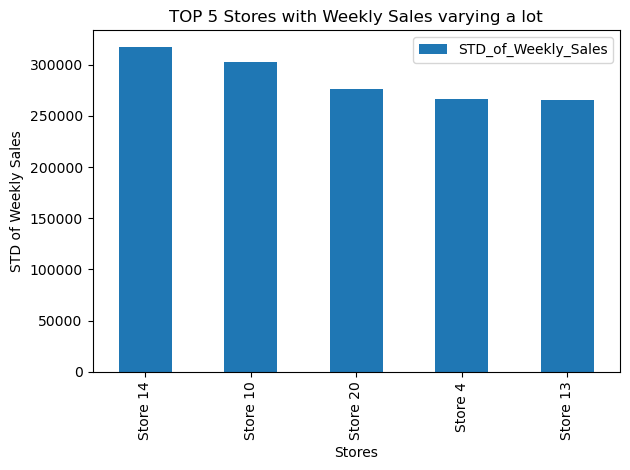

In [61]:
df_std.set_index('Store_Num').head(5).plot(kind = 'bar')

plt.xlabel("Stores")
plt.ylabel("STD of Weekly Sales")
plt.title("TOP 5 Stores with Weekly Sales varying a lot")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# 5 - TOP 5 Store with Weekly Sales varying a lot - On Annual Basis

In [63]:
df_std_yearly = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std_yearly.columns = ['Store_Num', 'Year', 'STD_of_Weekly_Sales']
df_std_yearly.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Store with Weekly Sales varying a lot - On Annual Basis\n")
df_std_yearly


TOP 5 Store with Weekly Sales varying a lot - On Annual Basis



Store_Num  Year  STD_of_Weekly_Sales
3    Store 10  2010        366059.644959
15   Store 14  2010        336759.641428
36   Store 20  2010        335859.866121
4    Store 10  2011        324215.949231
12   Store 13  2010        318291.323328
..        ...   ...                  ...
114  Store 44  2010         17039.383296
115  Store 44  2011         16752.638010
79   Store 33  2011         16674.977640
116  Store 44  2012         14116.587346
71   Store 30  2012         11862.256062

[135 rows x 3 columns]

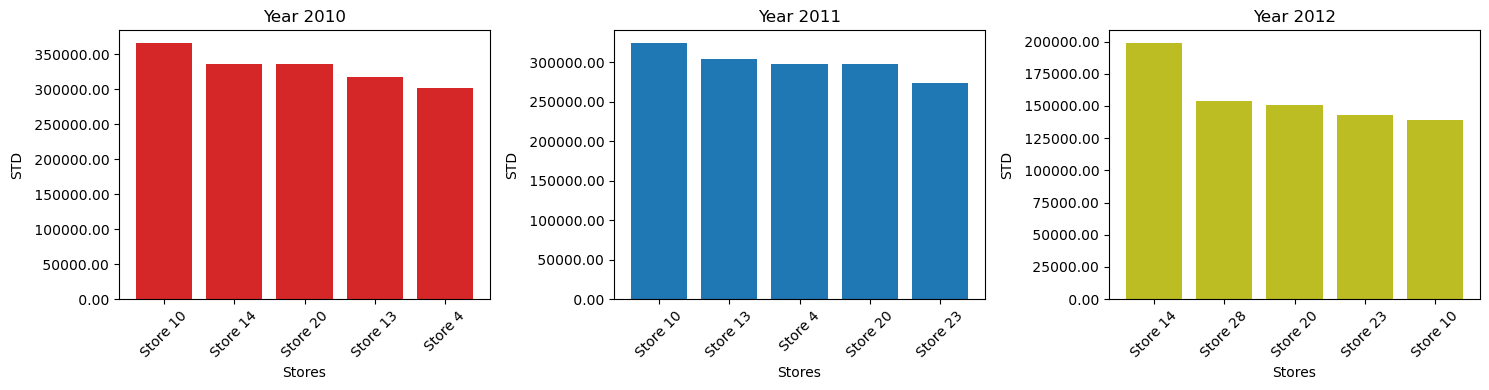

In [64]:
# Prepare Data
years = df_std_yearly.Year.unique()
years = sorted(years)

mycolors = ['tab:red', 'tab:blue', 'tab:olive'] #, 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']

# Plot
fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (15, 4))

for i, j in enumerate(years):
    
    data = df_std_yearly[df_std_yearly['Year'] == j].sort_values(by = ['STD_of_Weekly_Sales'], ascending = False).head(5)
        
    ax[i].bar(data['Store_Num'], data['STD_of_Weekly_Sales'], color = mycolors[i])
    
    #labels
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
    ax[i].set(xlabel = 'Stores')
    ax[i].set(ylabel = 'STD')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 45, axis = 'x')
    
    
plt.tight_layout()
plt.show()

In [65]:
#df

# 6 - Coefficient of Variation

In [67]:
df_stats = df.groupby(['Store_Num']).aggregate(
                                        Sum = ('Weekly_Sales','sum'), 
                                        Mean = ('Weekly_Sales','mean'), 
                                        STD = ('Weekly_Sales', 'std'),
                                        Variance = ('Weekly_Sales','var')
                                        )


#df_stats

### Coefficient of Variation

In [70]:
df_stats['Coeff_of_Variation'] = (df_stats['STD'] / df_stats['Mean']) * 100

print("\nStats\n")
df_stats.head()


Stats



Sum          Mean            STD      Variance  \
Store_Num                                                            
Store 1    2.224028e+08  1.555264e+06  155980.767761  2.433000e+10   
Store 10   2.716177e+08  1.899425e+06  302262.062504  9.136235e+10   
Store 11   1.939628e+08  1.356383e+06  165833.887863  2.750088e+10   
Store 12   1.442872e+08  1.009002e+06  139166.871880  1.936742e+10   
Store 13   2.865177e+08  2.003620e+06  265506.995776  7.049396e+10   

           Coeff_of_Variation  
Store_Num                      
Store 1             10.029212  
Store 10            15.913349  
Store 11            12.226183  
Store 12            13.792532  
Store 13            13.251363

# 7 - Average Weekly Sales in Holidays

In [72]:
df_compareHolidays = df.groupby(['Holiday'], as_index = False).aggregate(
                                        Mean_of_Weekly_Sales = ('Weekly_Sales', 'mean'), 
                                        ) # ['Store_Num', 'Holiday']

print("\nAverage Sales in Holidays and No Holiday\n")
df_compareHolidays


Average Sales in Holidays and No Holiday



Holiday  Mean_of_Weekly_Sales
0     Christmas          9.608331e+05
1    Labour Day          1.042427e+06
2    No Holiday          1.041256e+06
3    Super Bowl          1.079128e+06
4  Thanksgiving          1.471273e+06

In [73]:
fig = px.pie(df_compareHolidays,
            values = 'Mean_of_Weekly_Sales',
            names = 'Holiday',
            #color = '',
            hole = 0.2,
            width = 550,
            height = 450,
            #hover_name = 'Mean',
            hover_data = ['Mean_of_Weekly_Sales'] #['Holiday', 'Mean_of_Weekly_Sales']
            )
fig.update_traces(textinfo = 'label + percent', insidetextfont_color = "black", showlegend = False,) # 'text + percent'
#fig.update_layout(paper_bgcolor = "#000")

fig.show()

# 8 - Quaters that have highest sales

In [75]:
df1 = df.copy()
df1.set_index('Date', inplace = True)

In [76]:
df1.columns

Index(['Store_Num', 'Month_Num', 'Month_Name', 'Year', 'Holiday', 'Season',
       'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [77]:
df1.drop(columns = ['Month_Num', 'Month_Name', 'Year', 'Season',], axis = 1, inplace = True)

In [78]:
#df1

In [79]:
#df1.index

In [80]:
# df1.reset_index(inplace = True)
# df1

In [81]:
# plt.style.use('ggplot')
# df1['Weekly_Sales'].plot(figsize = (12, 4))

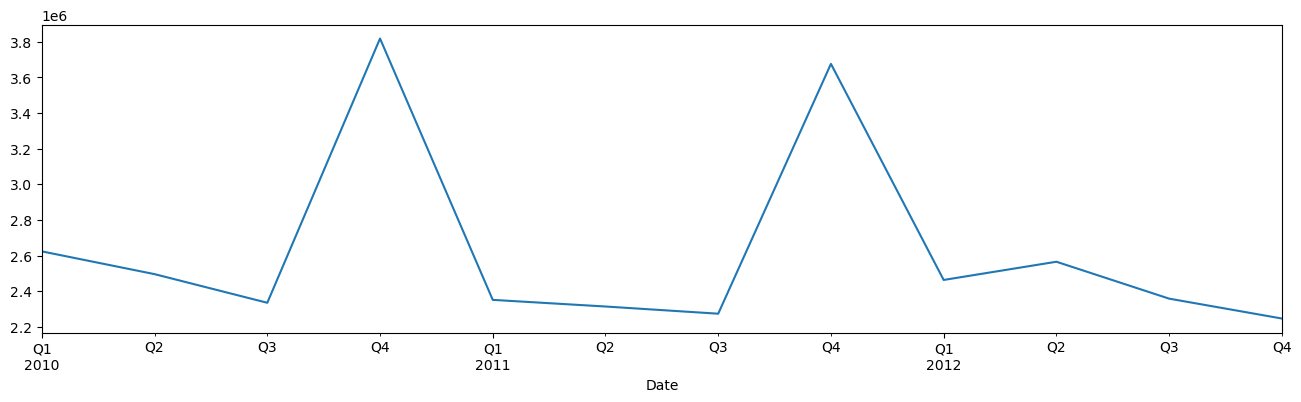

In [82]:
df1.resample(rule = 'QS').max()['Weekly_Sales'].plot(figsize = (16, 4))
plt.show()

# 9 - Heat Maps

In [85]:
df1.corr()

Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000

# 10 - Sales in Seasons

In [87]:
df_compareSeasons = df.groupby(['Season', 'Year'], as_index = False).aggregate(
                                        Mean = ('Weekly_Sales','mean'), 
                                        ) # ['Store_Num', Season', 'Year']


In [88]:
fig_compareSeasons = px.sunburst(df_compareSeasons, path = ['Season', 'Year'], # ['Store_Num', Season', 'Year']
                        values = 'Mean',
                        color = 'Mean',
                        color_continuous_scale = 'blues',
                        maxdepth = -1)

fig_compareSeasons.update_layout(margin = dict(t = 10, b = 10, r = 10, l = 10),
                                showlegend = False,
                                plot_bgcolor = 'black',
                                )
                  
fig_compareSeasons.show()


# Project Outcomes & Conclusions-:

1.The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped.                
2.Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.                
3.The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.                                                                                                                      
4.Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.                                                                                                               
5.It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable